In [1]:
import tensorboard
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard
import cv2 as cv

import sklearn 
from sklearn.model_selection import train_test_split

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 
%matplotlib inline

2023-09-11 18:10:20.828503: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-11 18:10:21.016381: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-11 18:10:21.018446: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 18:10:24.706107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Dataset 

In [11]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [12]:
x_train[0].shape

(28, 28)

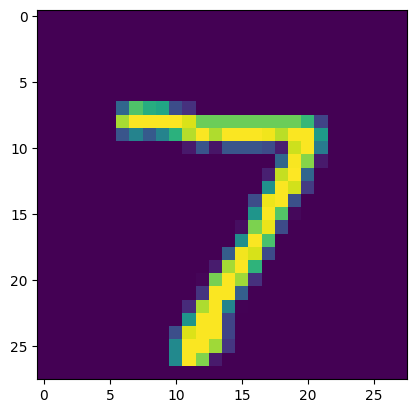

In [28]:
plt.imshow(x_test[0])

In [30]:
np.argmax(y_test[0])

7

## Data preproccesing


In [13]:
#data scaling convert the values between 0 to 1 instead of 0 to 255 

x_train = x_train/255 
x_test = x_test/255 


In [14]:
# categorical encoding 
num_classes = 10 

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

## Model Training 

In [15]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add (Dense(512, activation = "relu"))
model.add (Dense(512, activation = "relu"))
model.add (Dense(num_classes, activation = "softmax"))  

          

In [16]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=["accuracy"])

In [19]:
results = model.fit(x_train,y_train,epochs=10,validation_split=0.2,callbacks=tb_callback)

2023-09-11 18:14:47.722635: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1624 - accuracy: 0.9503 - val_loss: 0.1082 - val_accuracy: 0.9665
Epoch 2/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0823 - accuracy: 0.9743 - val_loss: 0.0929 - val_accuracy: 0.9723
Epoch 3/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0550 - accuracy: 0.9824 - val_loss: 0.1069 - val_accuracy: 0.9701
Epoch 4/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0437 - accuracy: 0.9857 - val_loss: 0.1026 - val_accuracy: 0.9743
Epoch 5/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.1093 - val_accuracy: 0.9746
Epoch 6/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0291 - accuracy: 0.9904 - val_loss: 0.0987 - val_accuracy: 0.9782
Epoch 7/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.1080 -

In [20]:
#model.save("MNIST_3")

INFO:tensorflow:Assets written to: MNIST_3/assets


INFO:tensorflow:Assets written to: MNIST_3/assets


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
#model.load_weights("MNIST")

## Making Predictions 

In [22]:
y_prob  = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [23]:
y_pred = y_prob.argmax(axis=1) 

y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

## Accuracy Score and Confusion Matrix 

In [25]:
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix

In [38]:
accuracy = accuracy_score(y_pred,np.argmax(y_test,axis=1))
accuracy

0.9777

In [39]:
confusion_matrix = multilabel_confusion_matrix(y_pred,np.argmax(y_test,axis=1))

In [21]:
confusion_matrix

array([[[9011,    8],
        [   9,  972]],

       [[8858,   16],
        [   7, 1119]],

       [[8947,   16],
        [  21, 1016]],

       [[8955,   17],
        [  35,  993]],

       [[8984,   11],
        [  34,  971]],

       [[9105,   50],
        [   3,  842]],

       [[9019,   13],
        [  23,  945]],

       [[8941,   22],
        [  31, 1006]],

       [[8974,   16],
        [  52,  958]],

       [[8983,   54],
        [   8,  955]]])

In [69]:
res = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [70]:
res

array([[6.95886287e-18, 5.52164759e-13, 3.75496563e-13, ...,
        9.99999940e-01, 2.58623886e-19, 7.21601002e-13],
       [7.73317589e-17, 2.72928152e-10, 9.99999940e-01, ...,
        1.33009348e-12, 1.97904272e-15, 6.90906153e-24],
       [1.46689396e-13, 9.99999940e-01, 1.81144766e-10, ...,
        2.10873274e-09, 1.16473942e-09, 3.83017367e-16],
       ...,
       [5.02732324e-29, 4.49245870e-21, 1.23756262e-27, ...,
        4.10272452e-23, 1.57410072e-18, 4.67201986e-15],
       [9.43556344e-26, 3.13802242e-30, 3.09495966e-32, ...,
        7.14313550e-23, 1.07505446e-17, 3.21501537e-21],
       [2.17516350e-14, 1.03188055e-16, 5.38108616e-18, ...,
        3.60872991e-22, 5.91523358e-14, 7.52383323e-19]], dtype=float32)

In [53]:
img = cv.imread("download.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

In [71]:
img.shape

(784,)

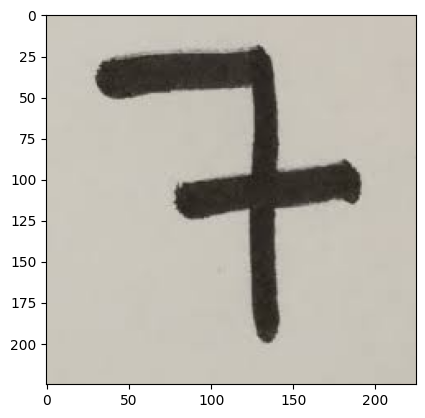

In [55]:
plt.imshow(img)

In [64]:
img = cv.resize(img,(28,28))

In [65]:
img = img.flatten()

In [66]:
img.shape

(784,)

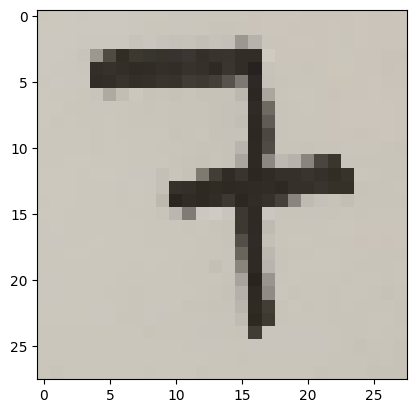

In [58]:
plt.imshow(img)